In [43]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

 Images in Height * Width should be flattened into one one dimension to padd into ML model

In [44]:
target = []
images = []
flat_data = []

DATADIR = r"C:\Users\manal\Desktop\Projects\ImageClassificatiom\images"

CATEGORIES = ['human being','robot']

### Preprocessing
1. Resizing
2. Flattening

In [45]:
for category in CATEGORIES:
    class_num = CATEGORIES.index(category)  # Label encoding values
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))  
        #imread reads the images in dimensions img_arra.shape with show height, width, RGB(depth)
        #print(img_array) # imread returns the image data in the array A . If the file contains a grayscale image, A is a two-dimensional (M-by-N) array. If the file contains a color image, A is a three-dimensional (M-by-N-by-3) array.
        #print(img_array.shape)
        #plt.imshow(img_array)
        #break
        img_resized = resize(img_array,(350,350,3)) # 350 * 350 is arbitary --> Normalizes from 0 to 1
        img_flattened = img_resized.flatten()
        # Appending data
        target.append(class_num)
        images.append(img_resized)
        flat_data.append(img_flattened)

# Converting flat data into numpy arrays
target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

<BarContainer object of 2 artists>

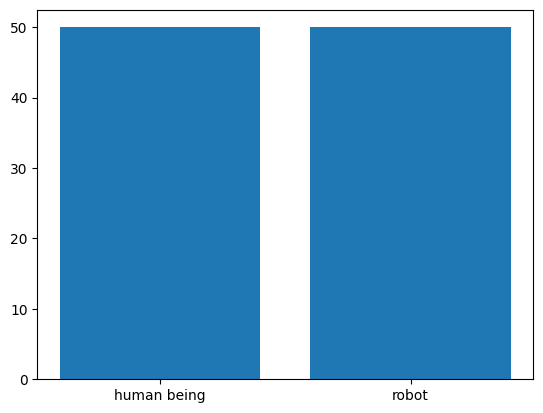

In [46]:
unique,count = np.unique(target, return_counts = True )
plt.bar(CATEGORIES,count)

Split data into Training & Testing

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=10)

In [48]:
# GRID Search
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
    { 'C': [1,10,100,1000], 'kernel': ['linear'] },
    { 'C': [1,10,100,1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001] }
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [49]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0])

In [50]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1])

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
accuracy_score(y_pred, y_test)

0.7

In [53]:
confusion_matrix(y_pred, y_test)

array([[13,  8],
       [ 1,  8]], dtype=int64)

# Saving the model using Pickle library

In [54]:
import pickle 
pickle.dump(clf,open('image_model.p','wb'))

In [55]:
model = pickle.load(open('image_model.p','rb'))

(750, 1200, 3)
PREDICTED OUTPUT: 


'human being'

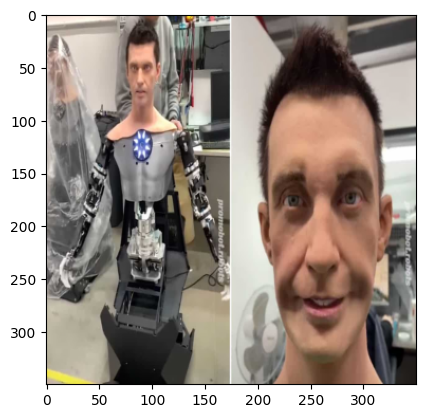

In [57]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img, (350,350,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print('PREDICTED OUTPUT: ')
y_out